In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
# sklearn が用意しているお試し用のデータセット
print ([i for i in dir(datasets) if i.startswith("load")])

['load_boston', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_lfw_pairs', 'load_lfw_people', 'load_linnerud', 'load_mlcomp', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files']


In [3]:
# sklearn が用意している人工データセット
print ([i for i in dir(datasets) if i.startswith("make")])

['make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make_friedman3', 'make_gaussian_quantiles', 'make_hastie_10_2', 'make_low_rank_matrix', 'make_moons', 'make_multilabel_classification', 'make_regression', 'make_s_curve', 'make_sparse_coded_signal', 'make_sparse_spd_matrix', 'make_sparse_uncorrelated', 'make_spd_matrix', 'make_swiss_roll']


In [4]:
# そのなかで iris をロードして用いる。
iris = datasets.load_iris()

In [5]:
# iris のデータを確認する。
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [6]:
# iris のデータの説明文
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
# iris のデータは dict 型で与えられている
print (iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
# ドットで呼び出すこともできる。これは特徴量の名前
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# 特徴量のデータ構造を確認する
print("data: ",iris.data.shape)

('data: ', (150, 4))


In [10]:
#特徴量を確認する
iris.data 

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [11]:
#特徴量の最初の５レコードを表示する
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [12]:
#特徴量の最初の５レコードをpandasを用いてカッコよく表示する
pd.DataFrame(iris.data,columns=iris.feature_names).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [13]:
# pandasを使って特徴量の統計量を確認する
pd.DataFrame(iris.data,columns=iris.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
#クラスラベル（回帰の時は被説明変数）
iris.target_names 

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [15]:
# ラベルのデータ構造を確認
print("target: ",iris.target.shape)

('target: ', (150,))


In [16]:
# ラベルのデータを確認
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

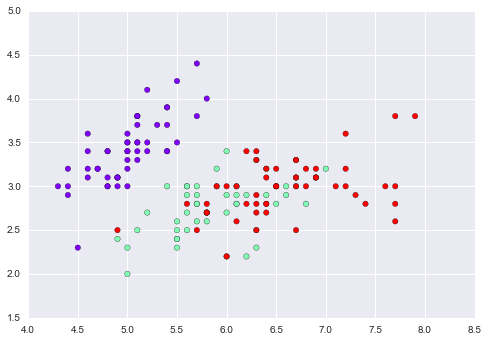

In [17]:
# 第一変数と第二変数でプロットする
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, s=30, cmap=plt.cm.rainbow)

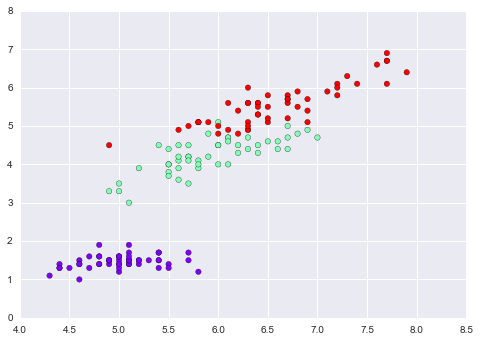

In [18]:
# 第一変数と第三変数でプロットする
plt.scatter(iris.data[:, 0], iris.data[:, 2], c=iris.target, s=30, cmap=plt.cm.rainbow)

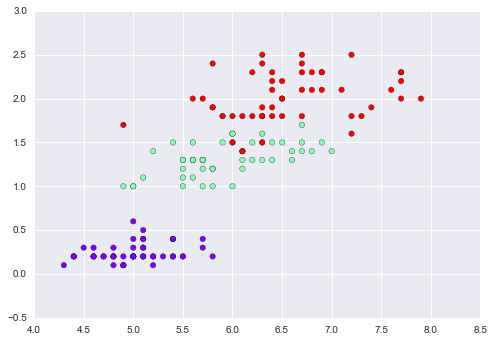

In [19]:
# 第一変数と第四変数でプロットする
plt.scatter(iris.data[:, 0], iris.data[:, 3], c=iris.target, s=30, cmap=plt.cm.rainbow)

In [20]:
# 主成分分析器を用意する。•
# n_components='mle' を指定すると最尤推定により主成分の個数を⾃動的に求める
pca = PCA(n_components = 'mle')

In [21]:
#主成分分析の実行
pca.fit(iris.data)

PCA(copy=True, n_components='mle', whiten=False)

In [22]:
# 主成分の数の確認
pca.n_components_

3

In [23]:
# 寄与率を確認。左から順に第一主成分、第二主成分、、、
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514])

In [24]:
# 累積寄与率を確認
np.cumsum(pca.explained_variance_ratio_)

array([ 0.92461621,  0.97763178,  0.99481691])

In [25]:
# 因子負荷量の確認。左から順に第一変数、第二変数、、、
# 上から順に第一主成分、第二主成分、、、
pd.DataFrame(pca.components_, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361590,-0.082269,0.856572,0.358844
1,-0.656540,-0.729712,0.175767,0.074706
2,0.580997,-0.596418,-0.072524,-0.549061


In [26]:
# データを主成分空間に写像 = 次元圧縮
x = pca.transform(iris.data)

In [27]:
# 圧縮後のデータ。左から順に第一主成分、第二主成分、、、
pd.DataFrame(x)

,0,1,2
0,-2.684207,-0.326607,0.021512
1,-2.715391,0.169557,0.203521
2,-2.889820,0.137346,-0.024709
3,-2.746437,0.311124,-0.037672
4,-2.728593,-0.333925,-0.096230
5,-2.279897,-0.747783,-0.174326
6,-2.820891,0.082105,-0.264251
7,-2.626482,-0.170405,0.015802
8,-2.887959,0.570798,-0.027335
9,-2.673845,0.106692,0.191533


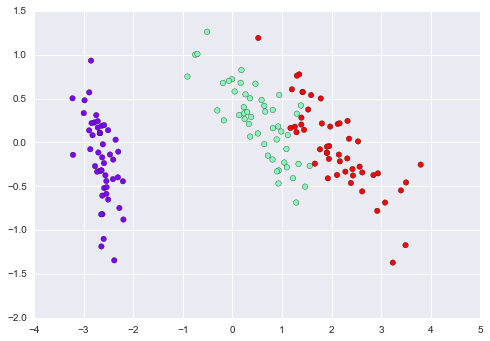

In [28]:
# 第一主成分と第二主成分でプロットする
plt.scatter(x[:, 0], x[:, 1], c=iris.target, s=30, cmap=plt.cm.rainbow)